<center><b> Hafsah Anibaba</b></center>
<center> WTF/23/DS/B/068 </center>

In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in data

data = pd.read_csv('chocolate_bars.csv')
data.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [3]:
data.dtypes

id                    int64
manufacturer         object
company_location     object
year_reviewed         int64
bean_origin          object
bar_name             object
cocoa_percent       float64
num_ingredients     float64
ingredients          object
review               object
rating              float64
dtype: object

In [4]:
data.shape

(2530, 11)

#### data wrangling

In [5]:
data.isna().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
data['id'].duplicated().sum()

1816

### EDA

#### Question 1

What is the average rating by country of origin?

In [8]:
rate = data[['rating', 'bean_origin']].groupby('bean_origin').mean()
rate = rate.reset_index()
rate.T

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
bean_origin,Australia,Belize,Blend,Bolivia,Brazil,Burma,Cameroon,China,Colombia,Congo,...,Tanzania,Thailand,Tobago,Togo,Trinidad,U.S.A.,Uganda,Vanuatu,Venezuela,Vietnam
rating,3.25,3.243243,3.085069,3.18038,3.25974,3.0,3.083333,3.5,3.205128,3.318182,...,3.24359,3.3,3.25,3.083333,3.244048,3.217742,3.097222,3.0625,3.239837,3.287671


In [9]:
rate = rate.sort_values(by = 'rating', ascending = False)
rate.T

,7,42,44,9,53,11,61,35,28,21,...,12,45,33,51,25,30,43,38,47,39
bean_origin,China,Sao Tome & Principe,Solomon Islands,Congo,Thailand,Cuba,Vietnam,Papua New Guinea,Madagascar,Haiti,...,DR Congo,Sri Lanka,Nigeria,Taiwan,Ivory Coast,Martinique,Sierra Leone,Principe,St.Vincent-Grenadines,Puerto Rico
rating,3.5,3.5,3.45,3.318182,3.3,3.291667,3.287671,3.280612,3.270468,3.266667,...,3.0,2.875,2.875,2.875,2.833333,2.75,2.75,2.75,2.75,2.714286


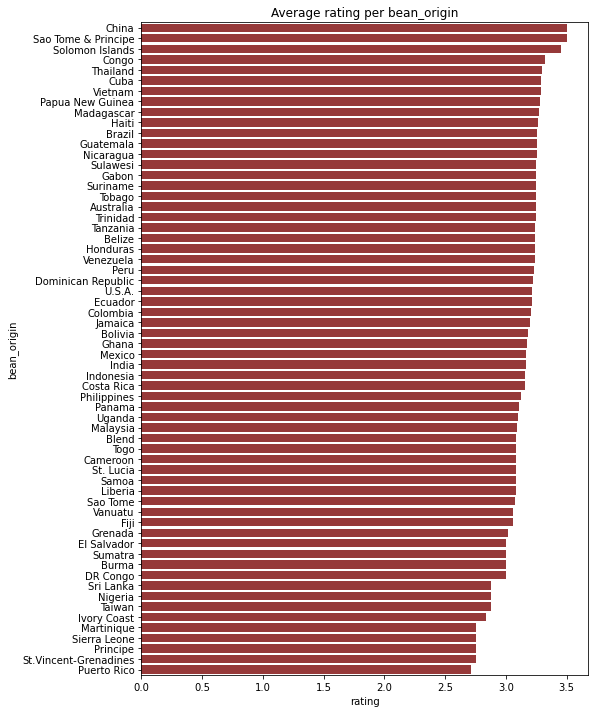

In [10]:
plt.figure(figsize = (8, 12))
sns.barplot(y = 'bean_origin', x = 'rating', data = rate, color = 'brown')
plt.title('Average rating per bean_origin');

#### Question 2 and 3

* How many bars were reviewed for each of those countries?
* Is the cacao bean's origin an indicator of quality?

In [11]:
data['bean_origin'].value_counts().to_frame().T

,Venezuela,Peru,Dominican Republic,Ecuador,Madagascar,Blend,Nicaragua,Bolivia,Colombia,Tanzania,...,Tobago,Martinique,Sumatra,Gabon,Burma,China,Principe,Sulawesi,Suriname,DR Congo
bean_origin,246,231,220,201,171,144,100,79,78,78,...,1,1,1,1,1,1,1,1,1,1


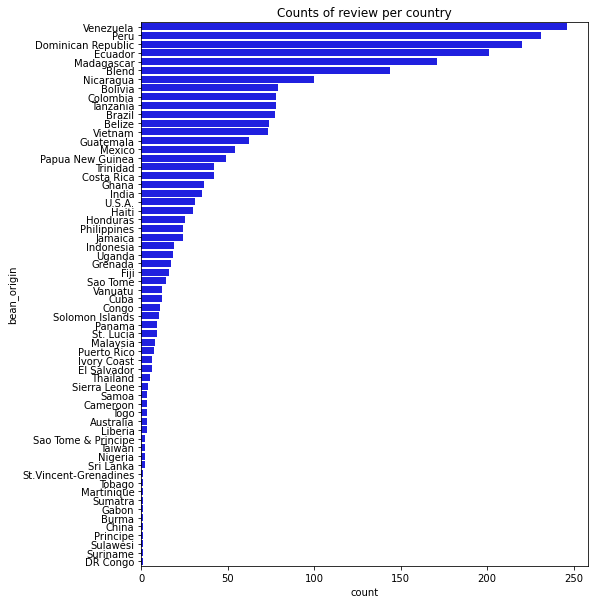

In [12]:
plt.figure(figsize = (8, 10))
order = data['bean_origin'].value_counts().index.to_list()
sns.countplot(y = data['bean_origin'], order = order, color = 'blue')
plt.title('Counts of review per country');

### Question 4

How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?

<AxesSubplot:xlabel='cocoa_percent', ylabel='rating'>

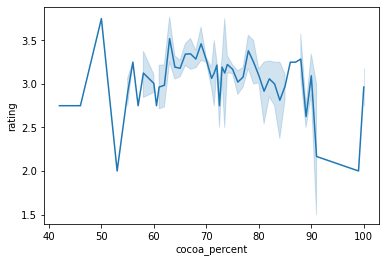

In [13]:
sns.lineplot(x = 'cocoa_percent', y = 'rating', data = data)

In [14]:
corr = data.corr().loc['cocoa_percent', 'rating']
print(f'The correlation between cocoa percent and rating is {round(corr, 2)}')

The correlation between cocoa percent and rating is -0.08


In [15]:
high_ratings = data[data['rating'] > 3.5]
average = high_ratings['cocoa_percent'].mean()
print(f'The average cocoa percent for bars with high rating is {round(average, 2)}%')

The average cocoa percent for bars with high rating is 71.0%


### Question 5

Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).

In [16]:
withL = round(data[data['ingredients'].str.contains('L')]['rating'].mean(), 2)
print(f'The average rating for bars with lecithin is {withL}')

The average rating for bars with lecithin is 3.15


In [17]:
withoutL = round(data[~data['ingredients'].str.contains('L')]['rating'].mean(), 2)
print(f'The average rating for bars without lecithin is {withoutL}')

The average rating for bars without lecithin is 3.23


### Summary

* Tobago has the highest average rating and Puerto-Rico has the lowest average rating
* Venezuela has the highest review while DR Congo has the lowest
* No the origin is not an indicator of quality as there is no much difference in their average ratings
* There is no strong correlation between cocoa percent and rating (-0.15). 
* The average cocoa percent for bars with high rating is 70.95%
* The average rating for bars with lecithin is 3.15 and The average rating for bars without lecithin is 3.23. The difference is little